# disneyland sentiment 

In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [28]:
disney = pd.read_csv("DisneylandReviews.csv", encoding="latin-1")
df = disney.copy()

In [29]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [31]:
df.shape

(42656, 6)

In [32]:
df.drop("Review_ID", axis=1, inplace=True)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,42656.0,4.217695,1.063371,1.0,4.0,5.0,5.0,5.0


In [35]:
df.Year_Month=df.Year_Month.apply(pd.to_datetime, errors ='coerce')

df["month"]=df.Year_Month.dt.month
df["year"]=df.Year_Month.dt.year

df.drop("Year_Month", axis=1, inplace=True)

In [36]:
df.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year
0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,4.0,2019.0
1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,5.0,2019.0
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,4.0,2019.0
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,4.0,2019.0
4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,4.0,2019.0


# text preprocessing

In [37]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [39]:
#lowercase
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [40]:
#numerical values
df["Review_Text"] = df["Review_Text"].str.replace("\d","")

In [41]:
#punctation
df["Review_Text"] = df["Review_Text"].str.replace("[^\w\s]","")

In [42]:
#stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
#lemmatization 
from textblob import Word
nltk.download("wordnet")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
#word tokenization
from nltk.tokenize import word_tokenize
df["tokens"] = df["Review_Text"].apply(lambda x: TextBlob(x).words)

In [45]:
df["frequency"] = df["Review_Text"].apply(lambda x: len(str(x).split(" "))) 

In [58]:
df.groupby("frequency").max()
df[df["Review_Text"].str.contains("visited disneyland paris least")]
longest_comment=df.iloc[42023,2]

In [60]:
longest_comment_tags=TextBlob(longest_comment).tags

In [61]:
df.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency
0,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,4.0,2019.0,"[youve, ever, disneyland, anywhere, youll, fin...",33
1,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,5.0,2019.0,"[since, last, time, visit, hk, disneyland, yet...",105
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4.0,2019.0,"[thanks, god, hot, humid, visiting, park, othe...",79
3,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,4.0,2019.0,"[hk, disneyland, great, compact, park, unfortu...",46
4,4,United Kingdom,location city took around hour kowlon kids lik...,Disneyland_HongKong,4.0,2019.0,"[location, city, took, around, hour, kowlon, k...",17


# data visualization

In [62]:
!pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [63]:
# we need convert all reviews to single text 

text = " ".join(i for i in df.Review_Text)

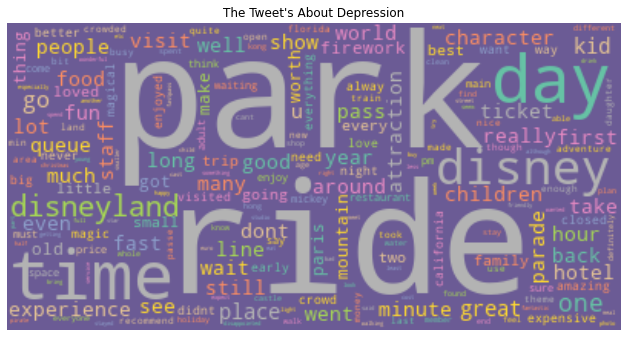

In [64]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

In [69]:
print("\n",
      "\n",text.count("disney"),
      "\n",text.count("park"),
      "\n",text.count("ride"),
      "\n",text.count("day"),
      "\n",text.count("time"),
      "\n",text.count("disneyland"),
      "\n",text.count("great"),
      "\n",text.count("really"),
      "\n",text.count("children"),
      "\n",text.count("minute"),
     )


 
 73168 
 57501 
 54146 
 48963 
 41484 
 33951 
 16969 
 12447 
 8619 
 8461


In [70]:
data = {
    "title": ["disney", "park" ,"ride", "day", "time", "disneyland", 
              "great","really","children", "minute"],
    "count": [73168, 57501, 54146, 48963, 41484, 33951, 16969, 12447, 8619, 8461],
}

In [71]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,disney,73168
1,park,57501
2,ride,54146
3,day,48963
4,time,41484
5,disneyland,33951
6,great,16969
7,really,12447
8,children,8619
9,minute,8461


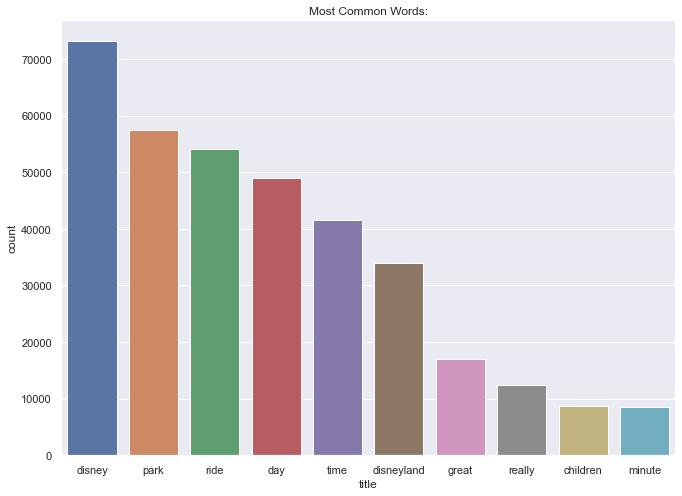

In [74]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

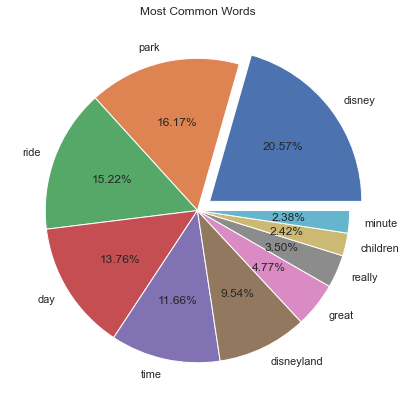

In [76]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0] 
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()

In [ ]:
#rating
#reviewer_location
#branch
#month
#year

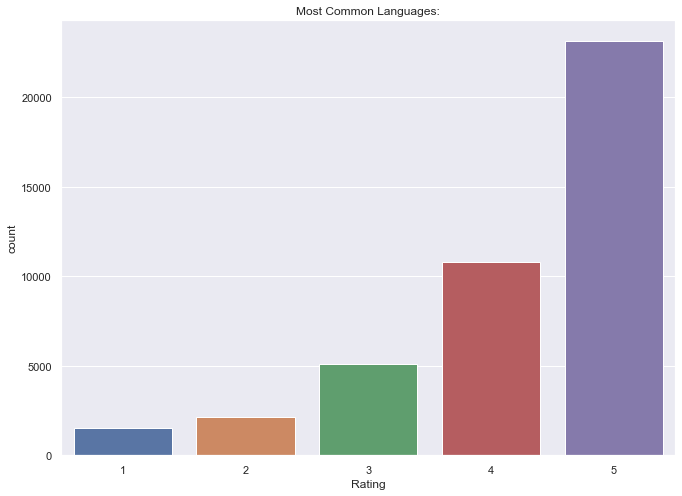

In [83]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="Rating").set(title="Most Common Languages:");

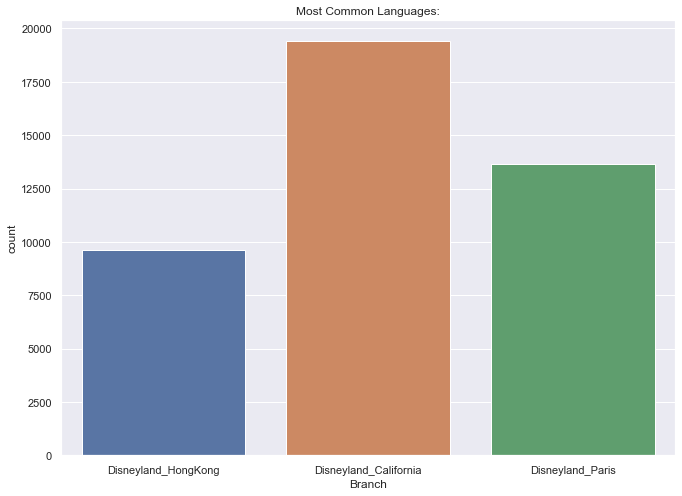

In [84]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="Branch").set(title="Most Common Languages:");

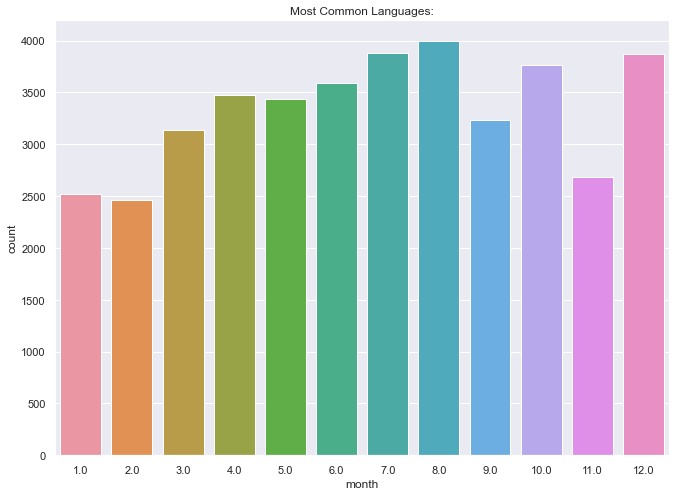

In [91]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="month").set(title="Most Common Languages:");

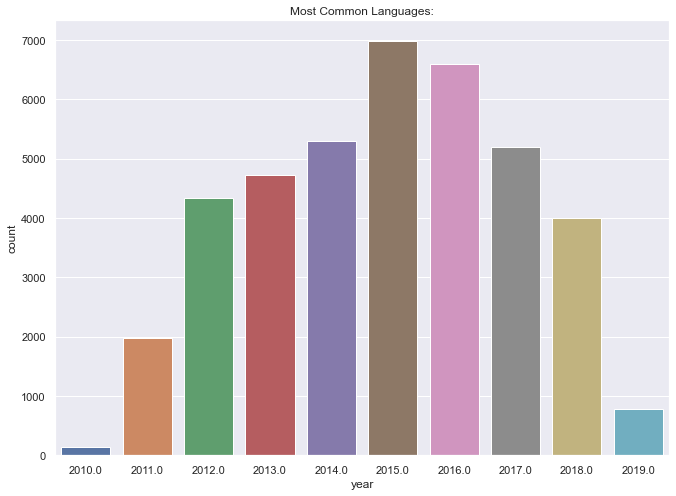

In [90]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df, x="year").set(title="Most Common Languages:");

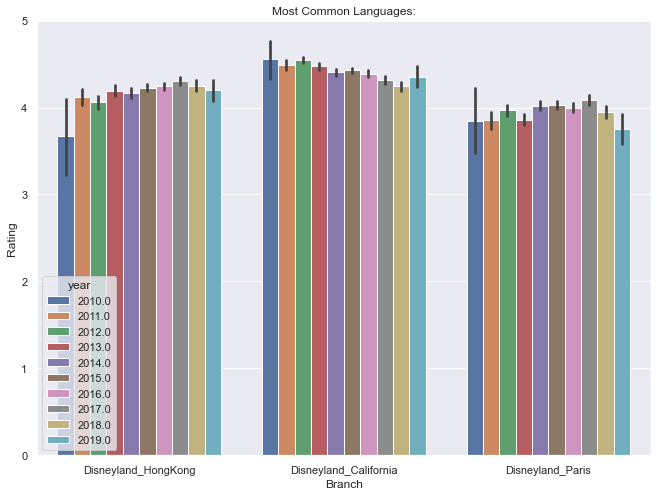

In [98]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=df, x="Branch", y="Rating", hue="year").set(title="Most Common Languages:");

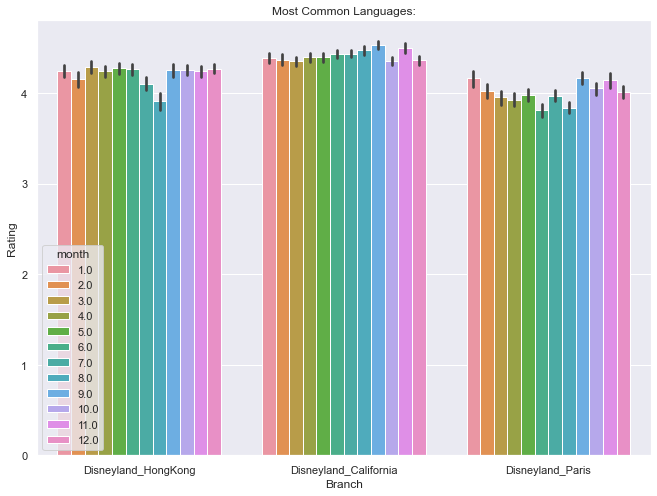

In [99]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=df, x="Branch", y="Rating", hue="month").set(title="Most Common Languages:");

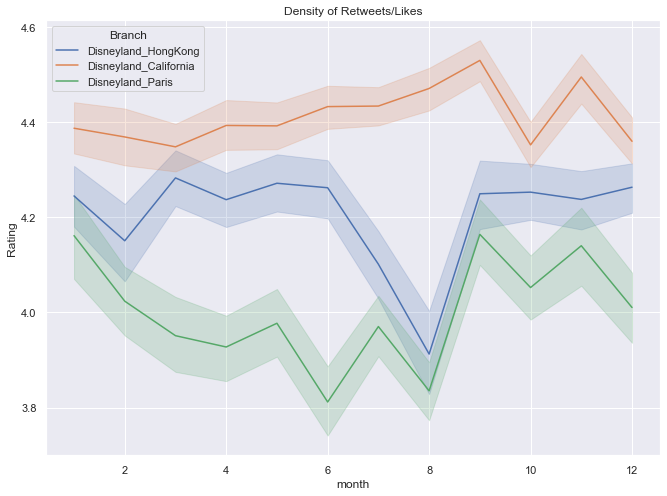

In [108]:
sns.lineplot(data=df, x="month", y="Rating", hue="Branch").set(title="Density of Retweets/Likes");

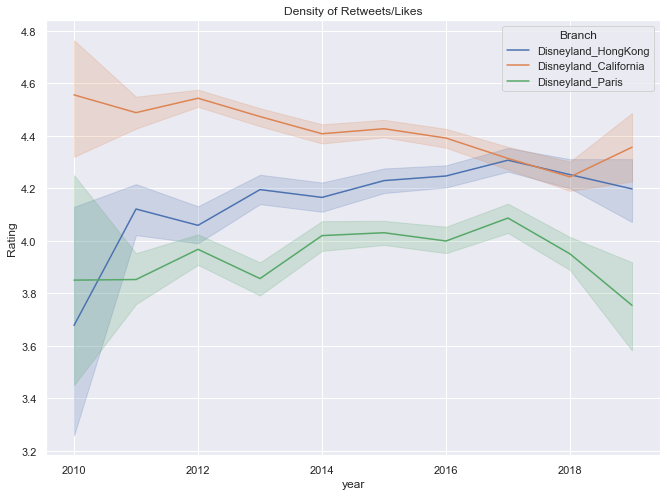

In [109]:
sns.lineplot(data=df, x="year", y="Rating", hue="Branch").set(title="Density of Retweets/Likes");

# sentiment

In [110]:
!pip install textblob 

from textblob import TextBlob

In [112]:
blob_emptyline2 = []

for i in df["Review_Text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)

In [113]:
df_blob2 = pd.DataFrame(blob_emptyline2)

In [114]:
df_blob3 = pd.concat([df.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity
0,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,4.0,2019.0,"[youve, ever, disneyland, anywhere, youll, fin...",33,0.226852,0.531481
1,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,5.0,2019.0,"[since, last, time, visit, hk, disneyland, yet...",105,0.209524,0.402381
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4.0,2019.0,"[thanks, god, hot, humid, visiting, park, othe...",79,0.226548,0.410238
3,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,4.0,2019.0,"[hk, disneyland, great, compact, park, unfortu...",46,0.222222,0.505556
4,4,United Kingdom,location city took around hour kowlon kids lik...,Disneyland_HongKong,4.0,2019.0,"[location, city, took, around, hour, kowlon, k...",17,0.266667,0.437500


In [115]:
df_blob3["Sentiment"] =  np.where(df_blob3["polarity"] >= 0 , "Positive", "Negative")

In [116]:
df_blob3.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,4.0,2019.0,"[youve, ever, disneyland, anywhere, youll, fin...",33,0.226852,0.531481,Positive
1,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,5.0,2019.0,"[since, last, time, visit, hk, disneyland, yet...",105,0.209524,0.402381,Positive
2,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,4.0,2019.0,"[thanks, god, hot, humid, visiting, park, othe...",79,0.226548,0.410238,Positive
3,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,4.0,2019.0,"[hk, disneyland, great, compact, park, unfortu...",46,0.222222,0.505556,Positive
4,4,United Kingdom,location city took around hour kowlon kids lik...,Disneyland_HongKong,4.0,2019.0,"[location, city, took, around, hour, kowlon, k...",17,0.266667,0.437500,Positive


# result

In [117]:
result = df_blob3["Sentiment"].value_counts()

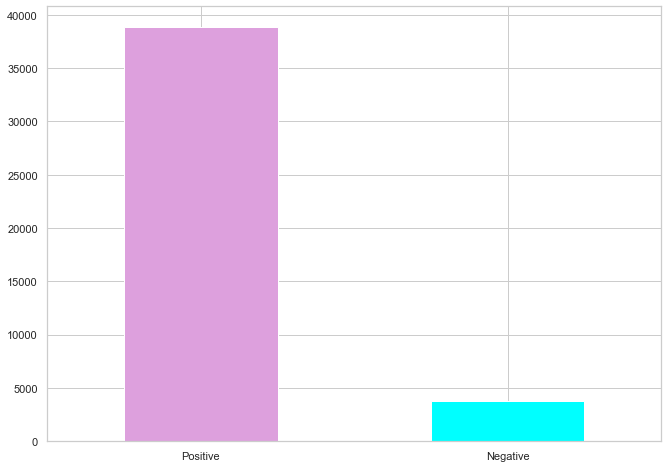

In [118]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [119]:
df_blob3.groupby("Sentiment").count()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,
Negative,3814,3814,3814,3814,3584,3584,3814,3814,3814,3814
Positive,38842,38842,38842,38842,36459,36459,38842,38842,38842,38842


In [130]:
df_blob3.groupby("polarity").max()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,tokens,frequency,subjectivity,Sentiment
polarity,,,,,,,,,,
-1.000000,4,United States,one gets bit boring suppose kids say got,Disneyland_HongKong,7.0,2018.0,"[one, gets, bit, boring, suppose, kids, say, got]",17,1.000000,Negative
-0.800000,5,Canada,food boring didnt dine go place serves soup sa...,Disneyland_California,3.0,2012.0,"[food, boring, didnt, dine, go, place, serves,...",14,0.975000,Negative
-0.750000,5,United States,vicinity kids go wont disappointed,Disneyland_Paris,12.0,2017.0,"[vicinity, kids, go, wont, disappointed]",20,0.750000,Negative
-0.716667,1,Japan,horrible minutes waiting degree weather ride l...,Disneyland_Paris,10.0,2018.0,"[horrible, minutes, waiting, degree, weather, ...",36,0.811111,Negative
-0.714286,3,United States,iwent measles going arounld got sick alot dont...,Disneyland_California,9.0,2014.0,"[iwent, measles, going, arounld, got, sick, al...",11,0.857143,Negative
...,...,...,...,...,...,...,...,...,...,...
0.916667,4,Singapore,splendid experience hk disneyland nights stay ...,Disneyland_HongKong,1.0,2017.0,"[splendid, experience, hk, disneyland, nights,...",11,1.000000,Positive
0.925000,5,United States,ridemax wwwridemaxcom absolutely awesome weve ...,Disneyland_California,8.0,2012.0,"[ridemax, wwwridemaxcom, absolutely, awesome, ...",21,1.000000,Positive
0.933333,5,United States,wonderful rides great food wonderful feeling t...,Disneyland_California,5.0,2018.0,"[wonderful, rides, great, food, wonderful, fee...",37,0.916667,Positive


In [141]:
df[df["Review_Text"].str.contains("years years come always")]
positive_comment=df.iloc[19672,2]
print(positive_comment)

years years come always pleasure disney rock lunch plaza inn always delicious hits spot cant forget caramel popcorn dca


In [138]:
df[df["Review_Text"].str.contains("one gets bit boring")]
negative_comment=df.iloc[10544,2]
print(negative_comment)

one gets bit boring suppose kids say got
